In [6]:
import pandas as pd
import numpy as np

# Define the folder path and specific file paths
# NOTE: The file path variables must be assigned correctly to their respective file names.

# The primary data file is crx.data
DATA_FILE_PATH = r"C:\Users\Asus\data\crx.data"

# These are documentation/metadata files, which we do not load into a DataFrame
credit_lisp_file = r"C:\Users\Asus\data\credit.lisp"
credit_names_file = r"C:\Users\Asus\data\credit.names"
crx_names_file = r"C:\Users\Asus\data\crx.names"
index_file = r"C:\Users\Asus\data\Index"


# 1. Load the Main Data File (crx.data)
print("--- 1. Loading Primary Data (crx.data) ---")
try:
    # Use the correctly assigned path: DATA_FILE_PATH
    # This is the ONLY file we load into a pandas DataFrame.
    # We use 'na_values='?' to correctly mark missing data.
    df = pd.read_csv(DATA_FILE_PATH, header=None, na_values='?')
    print(f" Data file '{DATA_FILE_PATH}' successfully loaded.")
except Exception as e:
    print(f"ERROR: Cannot load data file. Please ensure 'crx.data' is at the correct path.")
    print(f"Details: {e}")
    # Stop execution if loading fails, as the project cannot proceed without the data.
    exit()

# Assign generic column names
column_names = [f'A{i}' for i in range(1, 16)] + ['Target']
df.columns = column_names

print("\n--- Initial Inspection (Head) ---")
print(df.head())

print("\n--- Data Types and Null Counts (Info) ---")
# Display data types and identify which columns have missing values
df.info()

--- 1. Loading Primary Data (crx.data) ---
 Data file 'C:\Users\Asus\data\crx.data' successfully loaded.

--- Initial Inspection (Head) ---
  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 Target
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0      +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560      +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824      +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3      +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0      +

--- Data Types and Null Counts (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    objec

## Data Cleaning and Imputation

In [7]:
# Separate columns into categorical (object) and numerical (float/int) types
# Note: A2 is an 'object' but represents a numerical feature (Age). We handle it separately.
categorical_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'Target']
numerical_cols = ['A3', 'A8', 'A11', 'A15'] # A14 is float, A2 is object/numeric

# --- A. Impute Numerical Columns with Mean ---
# A14 is float64 but has missing values. A2 will be handled after type conversion.
print("Imputing A14 with Mean...")
df['A14'].fillna(df['A14'].mean(), inplace=True)

# --- B. Impute Categorical Columns with Mode ---
print("Imputing Categorical Columns (and A1, A4-A7) with Mode...")
for col in categorical_cols:
    if col != 'Target': # Target ko impute karne ki zaroorat nahi hai (0 missing)
        mode_val = df[col].mode()[0] 
        df[col].fillna(mode_val, inplace=True)

# --- C. Handle A2 (Numerical Feature loaded as Object) ---
# A2 is an object type, but contains numbers (except NaNs). We must impute it with the mean too.
# Note: Since A2 contains strings in some cases (if not purely NaN), we convert it to numeric first.
# This assumes the non-NaN values in A2 are numerical strings.
df['A2'] = pd.to_numeric(df['A2'], errors='coerce') # Ensure all non-numeric parts are NaN
df['A2'].fillna(df['A2'].mean(), inplace=True) # Impute remaining NaNs with the mean

print(" All missing values have been successfully imputed.")

Imputing A14 with Mean...
Imputing Categorical Columns (and A1, A4-A7) with Mode...
 All missing values have been successfully imputed.


C:\Users\Asus\AppData\Local\Temp\ipykernel_11088\3272785703.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A14'].fillna(df['A14'].mean(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11088\3272785703.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [ ]:
## Final Data Type Correction

In [8]:
# Convert A2 and A14 to integer after imputation.
df['A2'] = df['A2'].astype(int)
df['A14'] = df['A14'].astype(int)

# Final check for missing values
print("\n--- Final Check for Missing Values ---")
if df.isnull().sum().sum() == 0:
    print("Total missing values in DataFrame: 0.")
else:
    print(" Error: Missing values remain.")

print("\n--- Final Data Types ---")
df.info()


--- Final Check for Missing Values ---
Total missing values in DataFrame: 0.

--- Final Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    int32  
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    int32  
 14  A15     690 non-null    int64  
 15  Target  690 non-null    object 
dtypes: float64(2), int32(2), int64(2), object(10)
memory usage: 81.0+ KB


## Feature Encoding & Imbalance Check

In [9]:
# 1. Target Variable Encoding
# Change '+' to 1 (Approved) and '-' to 0 (Denied)
df['Target'] = df['Target'].replace({'+': 1, '-': 0})

print("Target variable successfully encoded (1=Approved, 0=Denied).")

Target variable successfully encoded (1=Approved, 0=Denied).


C:\Users\Asus\AppData\Local\Temp\ipykernel_11088\910448013.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['Target'].replace({'+': 1, '-': 0})


In [10]:
# 2. Identify Categorical Columns (all remaining 'object' types)
categorical_features = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
# drop_first=True is used to prevent multicollinearity (dummy variable trap)
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("\n--- Encoded DataFrame Shape ---")
print(f"Original shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")

# Display the first few rows of the encoded data
print("\n--- Encoded DataFrame Head (Showing new columns) ---")
print(df_encoded.head())


--- Encoded DataFrame Shape ---
Original shape: (690, 16)
Encoded shape: (690, 38)

--- Encoded DataFrame Head (Showing new columns) ---
   A2     A3    A8  A11  A14  A15  Target   A1_b  A4_u   A4_y  ...   A7_j  \
0  30  0.000  1.25    1  202    0       1   True  True  False  ...  False   
1  58  4.460  3.04    6   43  560       1  False  True  False  ...  False   
2  24  0.500  1.50    0  280  824       1  False  True  False  ...  False   
3  27  1.540  3.75    5  100    3       1   True  True  False  ...  False   
4  20  5.625  1.71    0  120    0       1   True  True  False  ...  False   

    A7_n   A7_o   A7_v   A7_z  A9_t  A10_t  A12_t  A13_p  A13_s  
0  False  False   True  False  True   True  False  False  False  
1  False  False  False  False  True   True  False  False  False  
2  False  False  False  False  True  False  False  False  False  
3  False  False   True  False  True   True   True  False  False  
4  False  False   True  False  True  False  False  False   True  

[5

In [ ]:
#Class Imbalance Check

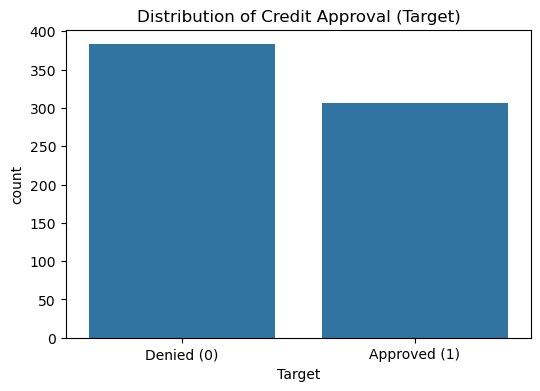


--- Imbalance Ratio ---
Total Denied (0): 383
Total Approved (1): 307
Denied to Approved Ratio: 1.25:1


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check Imbalance in the target variable (which is now numerical)
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df_encoded)
plt.title('Distribution of Credit Approval (Target)')
plt.xticks([0, 1], ['Denied (0)', 'Approved (1)'])
plt.show()

# Calculate the actual counts and ratio
approved_count = df_encoded['Target'].sum()
denied_count = df_encoded.shape[0] - approved_count
ratio = denied_count / approved_count

print(f"\n--- Imbalance Ratio ---")
print(f"Total Denied (0): {denied_count}")
print(f"Total Approved (1): {approved_count}")
print(f"Denied to Approved Ratio: {ratio:.2f}:1")

## Model Training (Logistic Regression)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y # Stratify ensures that the ratio (1.25:1) is maintained in both train and test sets.
)

# 2. Scaling Numerical Features (Crucial for Logistic Regression)
# Logistic Regression, jo ki internally distance-based hai, scaling se improve hota hai.
scaler = StandardScaler()

# Fit scaler only on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Data successfully split and scaled.")
print(f"Training set size: {X_train_scaled.shape[0]} samples")
print(f"Testing set size: {X_test_scaled.shape[0]} samples")

 Data successfully split and scaled.
Training set size: 552 samples
Testing set size: 138 samples


In [14]:
##Model Training
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression Model
# random_state=42 for reproducibility
logreg_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model on the scaled training data
print("\nTraining Logistic Regression Model...")
logreg_model.fit(X_train_scaled, y_train)

print("Logistic Regression Model successfully trained.")


Training Logistic Regression Model...
Logistic Regression Model successfully trained.


## Prediction & Evaluation

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the scaled test set
y_pred = logreg_model.predict(X_test_scaled)
y_prob = logreg_model.predict_proba(X_test_scaled)[:, 1] # Probability of being 'Approved' (class 1)

print("Predictions completed.")

Predictions completed.


In [ ]:
#Confusion Matrix


--- Confusion Matrix ---
[[67 10]
 [ 9 52]]


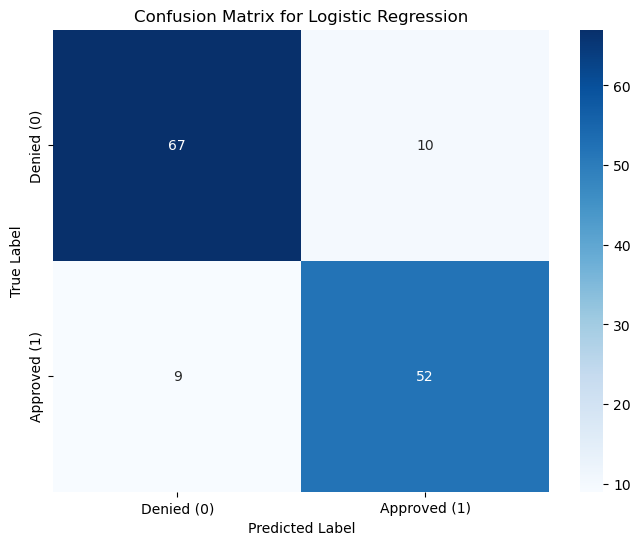

In [16]:
# Calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("\n--- Confusion Matrix ---")
print(cm)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Denied (0)', 'Approved (1)'], 
            yticklabels=['Denied (0)', 'Approved (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Interpretation of CM (Example for visualization context)
# [0,0] = True Negatives (Correctly predicted Denied)
# [0,1] = False Positives (Incorrectly predicted Approved)
# [1,0] = False Negatives (Incorrectly predicted Denied) -> Very dangerous in Finance
# [1,1] = True Positives (Correctly predicted Approved)

### Model Optimization (ROC AUC Score)



--- Model Optimization Results ---
ROC AUC Score: 0.9470


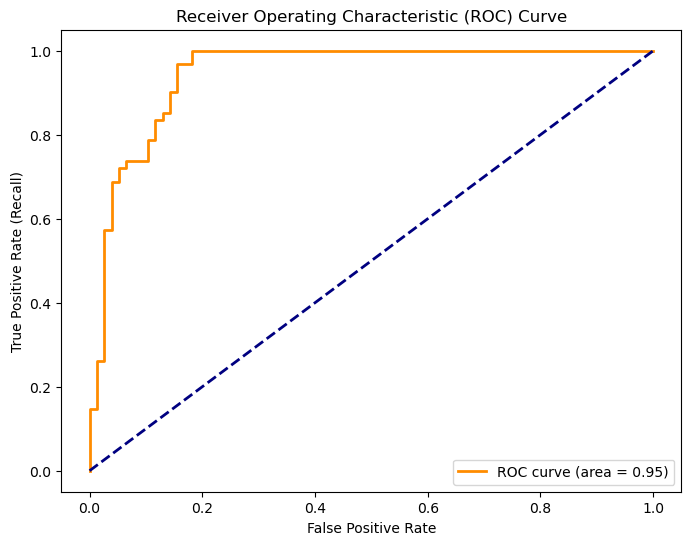

Interpretation: ROC AUC is excellent (>0.90), indicating strong classification ability.


In [17]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC AUC Score
# y_prob contains the probability of class 1 (Approved)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("\n--- Model Optimization Results ---")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve for visualization (Optional but highly recommended)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

if roc_auc > 0.90:
    print("Interpretation: ROC AUC is excellent (>0.90), indicating strong classification ability.")
else:
    print("Interpretation: ROC AUC is good, but potential exists for slight improvement.")